# 10 minutes to Koalas

This is a short introduction to Koalas, geared mainly for new users. This notebook shows you some key differences between Pandas and Koalas.

Customarily, we import Koalas as follows:

In [1]:
import pandas as pd
import numpy as np
import databricks.koalas as ks
from pyspark.sql import SparkSession


From now on, Spark will behave in a way that is closer to Pandas:
 - Spark DataFrames will have a large number of extra functions that mimic the Pandas functions
 - Spark columns will mimic the behavior of Pandas series
 - the `pyspark` package and the `spark` context object will have extra functions that mimic functions found in the `pandas` package.

## Object Creation



Creating a Koalas Series by passing a list of values, letting Koalas create a default integer index:

In [2]:
s = ks.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
Name: 0, dtype: float64

Creating a Koalas DataFrame by passing a dict of objects that can be converted to series-like.

In [4]:
kdf = ks.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [5]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creating a Pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [6]:
dates = pd.date_range('20130101', periods=6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [9]:
pdf

,A,B,C,D
2013-01-01,0.853714,-1.487006,0.577564,-0.495645
2013-01-02,0.791140,-0.116220,-0.938868,-0.106936
2013-01-03,0.678414,-0.471568,0.689616,0.844644
2013-01-04,-0.259876,0.040225,1.099792,0.299489
2013-01-05,1.006987,-1.001479,-0.652864,-0.484553
2013-01-06,0.024347,0.642705,-0.494230,0.040014


Now, this Pandas DataFrame can be converted to a Koalas DataFrame

In [10]:
kdf = ks.DataFrame(pdf)

In [11]:
type(kdf)

databricks.koalas.frame.DataFrame

It looks and behaves the same as a Pandas DataFrame though

In [12]:
kdf

,A,B,C,D
2013-01-01,0.853714,-1.487006,0.577564,-0.495645
2013-01-02,0.791140,-0.116220,-0.938868,-0.106936
2013-01-03,0.678414,-0.471568,0.689616,0.844644
2013-01-04,-0.259876,0.040225,1.099792,0.299489
2013-01-05,1.006987,-1.001479,-0.652864,-0.484553
2013-01-06,0.024347,0.642705,-0.494230,0.040014


Also, it is possible to create a Koalas DataFrame from Spark DataFrame.  

Creating a Spark DataFrame from Pandas DataFrame

In [13]:
spark = SparkSession.builder.getOrCreate()

In [14]:
sdf = spark.createDataFrame(pdf)

In [15]:
sdf.show()

+-------------------+-------------------+-------------------+--------------------+
|                  A|                  B|                  C|                   D|
+-------------------+-------------------+-------------------+--------------------+
| 0.8537139654145176| -1.487006337481196| 0.5775636852276063| -0.4956449623243172|
| 0.7911398623089244|-0.1162204740407712|  -0.93886792470794|-0.10693600625951105|
| 0.6784142261933892|-0.4715683305046967| 0.6896158012263733|  0.8446436849647062|
|-0.2598755258185626|0.04022480619455873| 1.0997916607187557| 0.29948948375078227|
| 1.0069873221906604|-1.0014786663212716|-0.6528642994278732| -0.4845534351759269|
|0.02434700881823707| 0.6427054204382725| -0.494229894665012| 0.04001360566160392|
+-------------------+-------------------+-------------------+--------------------+



Creating Koalas DataFrame from Spark DataFrame

In [16]:
kdf = ks.DataFrame(sdf)

In [17]:
kdf

,A,B,C,D
0,0.853714,-1.487006,0.577564,-0.495645
1,0.791140,-0.116220,-0.938868,-0.106936
2,0.678414,-0.471568,0.689616,0.844644
3,-0.259876,0.040225,1.099792,0.299489
4,1.006987,-1.001479,-0.652864,-0.484553
5,0.024347,0.642705,-0.494230,0.040014


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes) . Types that are common to both Spark and Pandas are currently supported.

In [18]:
kdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

## Viewing Data

See the [API Reference](https://koalas.readthedocs.io/en/latest/reference/index.html).

See the top rows of the frame. The results may not be the same as Pandas though: unlike Pandas, the data in a Spark dataframe is not _ordered_, it has no intrinsic notion of index. When asked for the head of a dataframe, Spark will just take the requested number of rows from a partition. Do not rely on it to return specific rows, use `.loc` or `iloc` instead.

In [19]:
kdf.head()

,A,B,C,D
0,0.853714,-1.487006,0.577564,-0.495645
1,0.791140,-0.116220,-0.938868,-0.106936
2,0.678414,-0.471568,0.689616,0.844644
3,-0.259876,0.040225,1.099792,0.299489
4,1.006987,-1.001479,-0.652864,-0.484553


Display the index, columns, and the underlying numpy data.

You can also retrieve the index; the index column can be ascribed to a DataFrame, see later

In [20]:
kdf.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [21]:
kdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
kdf.to_numpy()

array([[ 0.85371397, -1.48700634,  0.57756369, -0.49564496],
       [ 0.79113986, -0.11622047, -0.93886792, -0.10693601],
       [ 0.67841423, -0.47156833,  0.6896158 ,  0.84464368],
       [-0.25987553,  0.04022481,  1.09979166,  0.29948948],
       [ 1.00698732, -1.00147867, -0.6528643 , -0.48455344],
       [ 0.02434701,  0.64270542, -0.49422989,  0.04001361]])

Describe shows a quick statistic summary of your data

In [23]:
kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.515788,-0.398891,0.046835,0.016169
std,0.510079,0.762894,0.843504,0.508928
min,-0.259876,-1.487006,-0.938868,-0.495645
25%,0.024347,-1.001479,-0.652864,-0.484553
50%,0.678414,-0.471568,-0.494230,-0.106936
75%,0.853714,0.040225,0.689616,0.299489
max,1.006987,0.642705,1.099792,0.844644


Transposing your data

In [24]:
kdf.T

,0,1,2,3,4,5
A,0.853714,0.791140,0.678414,-0.259876,1.006987,0.024347
B,-1.487006,-0.116220,-0.471568,0.040225,-1.001479,0.642705
C,0.577564,-0.938868,0.689616,1.099792,-0.652864,-0.494230
D,-0.495645,-0.106936,0.844644,0.299489,-0.484553,0.040014


Sorting by its index

In [25]:
kdf.sort_index(ascending=False)

,A,B,C,D
5,0.024347,0.642705,-0.494230,0.040014
4,1.006987,-1.001479,-0.652864,-0.484553
3,-0.259876,0.040225,1.099792,0.299489
2,0.678414,-0.471568,0.689616,0.844644
1,0.791140,-0.116220,-0.938868,-0.106936
0,0.853714,-1.487006,0.577564,-0.495645


Sorting by value

In [26]:
kdf.sort_values(by='B')

,A,B,C,D
0,0.853714,-1.487006,0.577564,-0.495645
4,1.006987,-1.001479,-0.652864,-0.484553
2,0.678414,-0.471568,0.689616,0.844644
1,0.791140,-0.116220,-0.938868,-0.106936
3,-0.259876,0.040225,1.099792,0.299489
5,0.024347,0.642705,-0.494230,0.040014


## Missing Data
Koalas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. 


In [27]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [28]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [29]:
kdf1 = ks.from_pandas(pdf1)

In [30]:
kdf1

,A,B,C,D,E
2013-01-01,0.853714,-1.487006,0.577564,-0.495645,1.0
2013-01-02,0.791140,-0.116220,-0.938868,-0.106936,1.0
2013-01-03,0.678414,-0.471568,0.689616,0.844644,NaN
2013-01-04,-0.259876,0.040225,1.099792,0.299489,NaN


To drop any rows that have missing data.

In [31]:
kdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.853714,-1.487006,0.577564,-0.495645,1.0
2013-01-02,0.791140,-0.116220,-0.938868,-0.106936,1.0


Filling missing data.

In [32]:
kdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.853714,-1.487006,0.577564,-0.495645,1.0
2013-01-02,0.791140,-0.116220,-0.938868,-0.106936,1.0
2013-01-03,0.678414,-0.471568,0.689616,0.844644,5.0
2013-01-04,-0.259876,0.040225,1.099792,0.299489,5.0


## Operations

### Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [33]:
kdf.mean()

A    0.515788
B   -0.398891
C    0.046835
D    0.016169
dtype: float64

## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [34]:
kdf = ks.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [35]:
kdf

,A,B,C,D
0,foo,one,-0.758414,0.136816
1,bar,one,0.158930,1.006964
2,foo,two,-0.816920,-0.104509
3,bar,three,0.422269,1.430165
4,foo,two,-1.216577,-0.494138
5,bar,two,-0.502162,0.778228
6,foo,one,0.352320,0.572096
7,foo,three,1.243195,-0.797601


Grouping and then applying the [sum()](https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.groupby.GroupBy.sum.html#databricks.koalas.groupby.GroupBy.sum) function to the resulting groups.

In [36]:
kdf.groupby('A').sum()

,C,D
A,,
bar,0.079037,3.215357
foo,-1.196396,-0.687336


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [37]:
kdf.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.158930  1.006964
    three  0.422269  1.430165
    two   -0.502162  0.778228
foo one   -0.406094  0.708912
    three  1.243195 -0.797601
    two   -2.033497 -0.598647

## Plotting
See the <a href="https://koalas.readthedocs.io/en/latest/reference/frame.html#plotting">Plotting</a> docs.

In [77]:
%matplotlib inline
from matplotlib import pyplot as plt

In [78]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [84]:
kser = ks.Series(pser)

In [85]:
kser = kser.cummax()

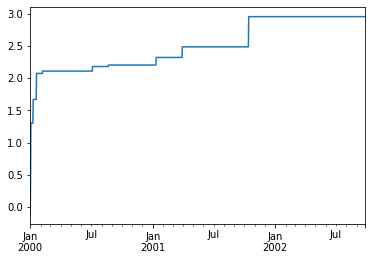

In [86]:
kser.plot()

On a DataFrame, the <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.frame.DataFrame.plot.html#databricks.koalas.frame.DataFrame.plot">plot()</a> method is a convenience to plot all of the columns with labels:

In [90]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [94]:
kdf = ks.DataFrame(pdf)

In [95]:
kdf = kdf.cummax()

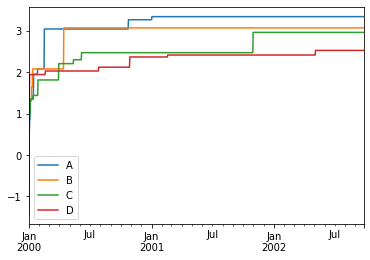

In [96]:
kdf.plot()

## Getting data in/out
See the <a href="https://koalas.readthedocs.io/en/latest/reference/io.html">Input/Output
</a> docs.

### CSV
<a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_csv.html#databricks.koalas.DataFrame.to_csv">Writing to a csv file.</a>

In [97]:
kdf.to_csv('foo.csv')

<a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_csv.html#databricks.koalas.read_csv">Reading from a csv file.</a>

In [98]:
ks.read_csv('foo.csv').head(10)

,A,B,C,D
0,0.163183,0.288157,-0.888004,-1.431802
1,0.470798,1.301486,0.974468,1.420470
2,0.867608,1.301486,0.974468,1.945874
3,0.867608,1.301486,0.974468,1.945874
4,1.357202,1.301486,1.350778,1.945874
5,1.357202,1.301486,1.350778,1.945874
6,1.357202,1.301486,1.350778,1.945874
7,1.357202,1.301486,1.350778,1.945874
8,1.357202,1.638737,1.350778,1.945874
9,1.357202,1.638737,1.350778,1.945874
